In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

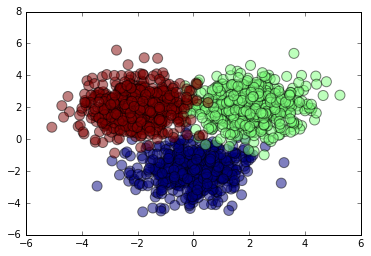

In [2]:
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

#OHE
N = len(Y)
T = np.zeros((N, K))
for i in xrange(N):
    T[i, Y[i]] = 1

In [3]:
# tf has it's own kinds of variables
# return tf variable 
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def forward(X, W1, b1, W2, b2):
    # sigmoid of X.W1
    Z = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    # return K, tf expects K not softmax/sigmoids of K
    return tf.matmul(Z, W2) + b2

# create tf placeholders
tfX = tf.placeholder(tf.float32, [None, D]) # placeholder for the data
# None cuz we don't know rows, D is columns. tf.float32 is type
tfY = tf.placeholder(tf.float32, [None, K])

W1 = init_weights([D, M])
b1 = init_weights([M])
W2 = init_weights([M, K])
b2 = init_weights([K])

py_x = forward(tfX, W1, b1, W2, b2)

# defining cost function
# takes logits as inputs (and not the softmax) and OHE targets 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, T))

# create train function
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # passing learning rate, and minimize cost mentioned above
predict_op = tf.argmax(py_x, 1) # axis = 1 ie. rows

# We need to create sessions in tf
sess = tf.Session()
# initialize vars defined
init = tf.initialize_all_variables()
sess.run(init)

In [7]:
for i in xrange(1000):
    sess.run(train_op, feed_dict={tfX: X, tfY: T}) # pass train func, a dict object which takes placeholders
    pred = sess.run(predict_op, feed_dict={tfX: X, tfY: T})
    if i % 10 == 0:
        print np.mean(Y == pred)

0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.334666666667
0.364666666667
0.420666666667
0.472666666667
0.537333333333
0.578666666667
0.606666666667
0.619333333333
0.628
0.636666666667
0.642
0.645333333333
0.648
0.648666666667
0.648666666667
0.648666666667
0.649333333333
0.649333333333
0.648666666667
0.648666666667
0.649333333333
0.649333333333
0.649333333333
0.649333333333
0.65
0.653333333333
0.665333333333
0.694
0.731333333333
0.772666666667
0.817333333333
0.85
0.872666666667
0.890666666667
0.905333333333
0.925333333333
0.932666666667
0.936666666667
0.942
0.944666666667
0.946
0.948666666667
0.949333333333
0.95
0.948666666667
0.95
0.951333333333
0.952666666667
0.954666666667
0.957333333333
0.958
0.958666666667
0.958
0.958666666667
0.958
0.957333333333
0.957333333333
0.956666666667
0.956666666667
0.958
0.958
0.958
0.958
0.958
0.959333333333
0.959333333333
0.96
0.959333333333
0.9593